In [ ]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')    
    print(os.getcwd())

In [ ]:
from tensorflow.io import gfile
from tcav.tcav_examples.discrete.kdd99_activation_generator import KDD99DiscreteActivationGenerator
from tcav.utils import create_session
from tcav.tcav_examples.discrete.kdd99_model_wrapper import KDD99KerasModelWrapper


In [ ]:
# Make source directory, 
source_dir = "./tcav/tcav_examples/discrete/kdd_sanity2"
working_dir = source_dir
acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)
cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)


In [ ]:
# Make data
! python ./tcav/tcav_examples/discrete/make_kdd99_concepts.py --source_dir={source_dir}


Available concepts for KDD99 dataset are: 
['dst_host_same_src_port_rate_less_than_one', 'dst_host_same_src_port_rate_more_than_one']


Available targets for KDD99 dataset are: 
[b'normal.' b'buffer_overflow.' b'loadmodule.' b'perl.' b'neptune.'
 b'smurf.' b'guess_passwd.' b'pod.' b'teardrop.' b'portsweep.' b'ipsweep.'
 b'land.' b'ftp_write.' b'back.' b'imap.' b'satan.' b'phf.' b'nmap.'
 b'multihop.' b'warezmaster.' b'warezclient.' b'spy.' b'rootkit.']


Created 10 random folders 

Successfully created data at ./tcav/tcav_examples/discrete/kdd_sanity2


In [ ]:
# Create models
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "kdd99_2.h5")
uci_model = KDD99KerasModelWrapper(create_session(), model_path, label_path)





Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 41)]         0                                            
__________________________________________________________________________________________________
tf_op_layer_split (TensorFlowOp [(None, 1), (None, 1 0           input[0][0]                      
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 200)       600         tf_op_layer_split[0][1]          
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 200)       13200       tf_op_layer_split[0][2]          
___________

395216/395216 [==============================] - 80s 203us/sample - loss: 2.2280 - acc: 0.9755 - val_loss: 2.2498 - val_acc: 0.9824
Epoch 2/4
395216/395216 [==============================] - 88s 223us/sample - loss: 2.2174 - acc: 0.9817 - val_loss: 2.2282 - val_acc: 0.9821
Epoch 3/4
395216/395216 [==============================] - 77s 195us/sample - loss: 2.2172 - acc: 0.9818 - val_loss: 2.2250 - val_acc: 0.9824
Epoch 4/4
395216/395216 [==============================] - 83s 211us/sample - loss: 2.2170 - acc: 0.9820 - val_loss: 2.2265 - val_acc: 0.9821
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.2406063e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8520823e-05
  9.9999428e-01 0.0000000e+00 0.00000

In [ ]:
# Create activation generator
act_gen = KDD99DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

In [ ]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

target = "normal."
bottlenecks = ["dense", "dense_1" ]
concepts = ["dst_host_same_src_port_rate_less_than_one", "dst_host_same_src_port_rate_more_than_one"]
alphas = [0.01]



my_tcav = TCAV(create_session,
                   target,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)


results = my_tcav.run()



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Class = normal.
  Concept = dst_host_same_src_port_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.70 (+- 0.46), random was 0.43 (+- 0.47). p-val = 0.093 (not significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.01), random was 0.50 (+- 0.48). p-val = 0.002 (significant)
  Concept = dst_host_same_src_port_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.97 (+- 0.08), random was 0.43 (+- 0.47). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.01), random was 0.50 (+- 0.48). p-val = 0.002 (significant)
{'dense': {'bn_vals': [0.01, 0.9745000000000001], 'bn_stds': [0, 0.0765], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.9960000000000001, 0.9955], 'bn_stds': [0.012000000000000009, 0.01350000000000001], 'significant': [True, True]}}


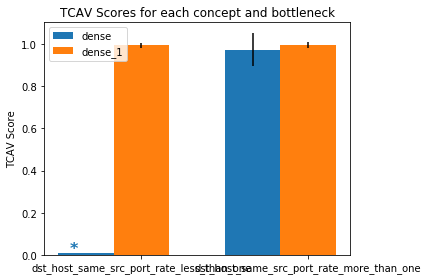

In [ ]:
utils_plot.plot_results(results, num_random_exp=10)

